In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

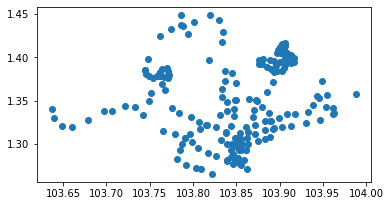

In [2]:
train_stations = gpd.read_file(r"D:\NUS\project\LTA_data\point_data\train_stations\train_station_wszone.shp")
train_stations.plot()
train_stations = train_stations.to_crs('epsg:4326')

In [3]:
train_stations_2 = train_stations.copy()
train_stations_2

,OBJECTID_l,STN_NAME,PT_CODE1,SUBZONE_N,geometry
0,1,EUNOS MRT STATION,EW7,GEYLANG EAST,POINT (103.90325 1.31978)
1,2,CHINESE GARDEN MRT STATION,EW25,LAKESIDE,POINT (103.73260 1.34235)
2,3,KHATIB MRT STATION,NS14,KHATIB,POINT (103.83298 1.41738)
3,4,KRANJI MRT STATION,NS7,TURF CLUB,POINT (103.76217 1.42518)
4,5,REDHILL MRT STATION,EW18,REDHILL,POINT (103.81682 1.28956)
...,...,...,...,...,...
184,0,SPRINGLEAF MRT STATION,TE4,SPRINGLEAF,POINT (103.81850 1.39743)
185,1,LENTOR MRT STATION,TE5,TAGORE,POINT (103.83682 1.38444)
186,2,MAYFLOWER MRT STATION,TE6,KEBUN BAHRU,POINT (103.83686 1.37284)
187,3,BRIGHT HILL MRT STATION,TE7,UPPER THOMSON,POINT (103.83323 1.36320)


<AxesSubplot:>

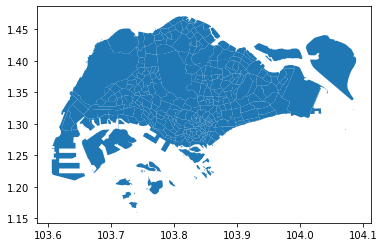

In [4]:
subzone = gpd.read_file(r"D:\NUS\project\Singapore_subzone\subzone_2019\MasterPlan_SUBZONE_2019\master-plan-2019-subzone-boundary-no-sea-geojson-polygon.shp")
subzone = subzone.to_crs('epsg:4326')
subzone.plot()

In [5]:
subzone_train_stations = gpd.sjoin(train_stations,subzone,how = 'left',rsuffix="szon")

In [6]:
subzone_train_stations.columns

Index(['OBJECTID_l', 'STN_NAME', 'PT_CODE1', 'SUBZONE_N_left', 'geometry',
       'index_szon', 'Name', 'SUBZONE_N_szon', 'SUBZONE_C', 'PLANAREA_N',
       'PLANAREA_C', 'REGION_N', 'REGION_C', 'AREA', 'X_COORD', 'Y_COORD'],
      dtype='object')

In [190]:
subzone_train_stations = subzone_train_stations[['SUBZONE_N_left','PT_CODE1']]

In [191]:
subzone_train_stations['SUBZONE_N'] = subzone_train_stations['SUBZONE_N_left']
subzone_train_stations = subzone_train_stations.drop('SUBZONE_N_left',axis = 1)
subzone_train_stations

,PT_CODE1,SUBZONE_N
0,EW7,GEYLANG EAST
1,EW25,LAKESIDE
2,NS14,KHATIB
3,NS7,TURF CLUB
4,EW18,REDHILL
...,...,...
184,TE4,SPRINGLEAF
185,TE5,TAGORE
186,TE6,KEBUN BAHRU
187,TE7,UPPER THOMSON


In [192]:
lis_subzone = list(subzone_train_stations['SUBZONE_N'])

In [8]:
subzone_train_stations.sort_values('PT_CODE1')

,PT_CODE1,SUBZONE_N
62,BP1,CHOA CHU KANG CENTRAL
46,BP10,FAJAR
81,BP11,SAUJANA
59,BP12,SAUJANA
58,BP13,SENJA
...,...,...
184,TE4,SPRINGLEAF
185,TE5,TAGORE
186,TE6,KEBUN BAHRU
187,TE7,UPPER THOMSON


In [9]:
train_od = pd.read_csv(r"D:\NUS\project\LTA_data\raw_data\origin_destination_train_202201.csv")
train_od.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-01,WEEKENDS/HOLIDAY,9,TRAIN,DT24,EW32,1
1,2022-01,WEEKDAY,6,TRAIN,BP4,EW31,21
2,2022-01,WEEKENDS/HOLIDAY,6,TRAIN,BP4,EW31,1
3,2022-01,WEEKDAY,12,TRAIN,NE15,SW5,59
4,2022-01,WEEKDAY,12,TRAIN,SW5,NE15,74


In [10]:
lis_origin_mrt = np.unique(list(set(train_od['ORIGIN_PT_CODE'])))
lis_destination_mrt = np.unique(list(set(train_od['DESTINATION_PT_CODE'])))

In [11]:
print(len(train_stations),len(lis_origin_mrt),len(lis_destination_mrt),)

189 165 164


In [12]:
lis1 = list(lis_origin_mrt)
lis2 = list(lis_destination_mrt)

lis1.append(lis2)
all_station = np.unique(lis_origin_mrt)
len(all_station)

165

In [13]:
same_station = {"CC29": "NE1", "CE1":"DT16"}
all_stations2 = []
for st in all_station:
    st = st.split("-")[0]
    st = st.split("/")[0]
    if st in same_station:
        st = same_station[st]
    all_stations2.append(st)
all_stations2 = list(set(all_stations2))

In [42]:
len(all_stations2)

165

In [95]:
lis_not_match_station_1 = []
lis_stations_sum = list(subzone_train_stations['PT_CODE1'])
for i in all_stations2:
    if not(i in lis_origin_mrt):
        lis_not_match_station_1.append(i)

In [96]:
lis_not_match_station_1

['NS4',
 'NS9',
 'CC4',
 'NE1',
 'NS17',
 'CC10',
 'CG1',
 'NS21',
 'EW14',
 'EW13',
 'NE7',
 'CC19',
 'CC17',
 'EW2',
 'NE12',
 'NS27',
 'EW16',
 'EW8',
 'CC22',
 'NE4',
 'EW24',
 'NE17',
 'DT16',
 'NE16',
 'BP6',
 'NS24',
 'EW12']

In [88]:
lis_not_match_station_2 = []
for i in lis_origin_mrt:
    if not(i in all_stations2):
        lis_not_match_station_2.append(i)
lis_not_match_station_2

['BP6/DT1',
 'CC10/DT26',
 'CC17/TE9',
 'CC19/DT9',
 'CC22/EW21',
 'CC4/DT15',
 'CE1/DT16',
 'CG1/DT35',
 'EW12/DT14',
 'EW13/NS25',
 'EW14/NS26',
 'EW16/NE3',
 'EW2/DT32',
 'EW24/NS1',
 'EW8/CC9',
 'NE1/CC29',
 'NE12/CC13',
 'NE16/STC',
 'NE17/PTC',
 'NE4/DT19',
 'NE7/DT12',
 'NS17/CC15',
 'NS21/DT11',
 'NS24/NE6/CC1',
 'NS27/CE2',
 'NS4/BP1',
 'NS9/TE2']

In [197]:
for i in range(len(lis_not_match_station_2)):
    a = lis_not_match_station_2[i].split('/')[0]
    print(a)
    subzone_train_stations.loc[subzone_train_stations['PT_CODE1'] == a] = lis_not_match_station_2[i]
subzone_train_stations

BP6
CC10
CC17
CC19
CC22
CC4
CE1
CG1
EW12
EW13
EW14
EW16
EW2
EW24
EW8
NE1
NE12
NE16
NE17
NE4
NE7
NS17
NS21
NS24
NS27
NS4
NS9


,PT_CODE1,SUBZONE_N
0,EW7,GEYLANG EAST
1,EW25,LAKESIDE
2,NS14,KHATIB
3,NS7,TURF CLUB
4,EW18,REDHILL
...,...,...
184,TE4,SPRINGLEAF
185,TE5,TAGORE
186,TE6,KEBUN BAHRU
187,TE7,UPPER THOMSON


In [193]:
lis_subzone

['GEYLANG EAST',
 'LAKESIDE',
 'KHATIB',
 'TURF CLUB',
 'REDHILL',
 'YEW TEE',
 'JURONG WEST CENTRAL',
 'COMMONWEALTH',
 'GEYLANG EAST',
 'SIMEI',
 'TAMPINES EAST',
 'WOODLANDS EAST',
 'YISHUN WEST',
 'PASIR RIS CENTRAL',
 'CLEMENTI NORTH',
 'ALJUNIED',
 'XILIN',
 'CHOA CHU KANG CENTRAL',
 'JURONG GATEWAY',
 'MEI CHIN',
 'TUAS PROMENADE',
 'GUL CIRCLE',
 'WOODLANDS REGIONAL CENTRE',
 'TUAS NORTH',
 'BOON KENG',
 'TUAS BAY',
 'ONE NORTH',
 'SINGAPORE POLYTECHNIC',
 'SEMBAWANG CENTRAL',
 'KEMBANGAN',
 'BUKIT BATOK CENTRAL',
 'CHENG SAN',
 'JURONG WEST CENTRAL',
 'GUILIN',
 'WOODLANDS WEST',
 'BEDOK NORTH',
 'JOO KOON',
 'TAMAN JURONG',
 'BEDOK SOUTH',
 'YIO CHU KANG',
 'WATERWAY EAST',
 'PUNGGOL TOWN CENTRE',
 'ANCHORVALE',
 'FERNVALE',
 'ANCHORVALE',
 'JELEBU',
 'FAJAR',
 'PUNGGOL TOWN CENTRE',
 'NORTHSHORE',
 'PUNGGOL TOWN CENTRE',
 'MATILDA',
 'WATERWAY EAST',
 'PUNGGOL FIELD',
 'FERNVALE',
 'TECK WHYE',
 'WATERWAY EAST',
 'PUNGGOL FIELD',
 'PUNGGOL FIELD',
 'SENJA',
 'SAUJANA',
 'JEL

In [198]:
subzone_train_stations.loc[subzone_train_stations['PT_CODE1'] == 'NS24/NE6/CC1'] = 'CE1/DT16'

In [200]:
subzone_train_stations['SUBZONE_N'] = lis_subzone

In [203]:
subzone_train_stations

,PT_CODE1,SUBZONE_N
0,EW7,GEYLANG EAST
1,EW25,LAKESIDE
2,NS14,KHATIB
3,NS7,TURF CLUB
4,EW18,REDHILL
...,...,...
184,TE4,SPRINGLEAF
185,TE5,TAGORE
186,TE6,KEBUN BAHRU
187,TE7,UPPER THOMSON


In [204]:
subzone_train_stations.to_csv(r'D:\NUS\project\LTA_data\point_data\train_stations\mrt_matching_LTA.csv',index = False)

In [138]:
lis = list(train_stations_2['PT_CODE1'])

In [156]:
lis_not_match_station_1 = []
lis_stations_sum = list(train_stations_2['PT_CODE1'])
for i in lis_origin_mrt:
    if not(i in lis):
        print(i)

BP6/DT1
CC10/DT26
CC17/TE9
CC19/DT9
CC22/EW21
CC4/DT15
CE1/DT16
CG1/DT35
EW12/DT14
EW13/NS25
EW14/NS26
EW16/NE3
EW2/DT32
EW24/NS1
EW8/CC9
NE1/CC29
NE12/CC13
NE16/STC
NE17/PTC
NE4/DT19
NE7/DT12
NS17/CC15
NS21/DT11
NS24/NE6/CC1
NS27/CE2
NS4/BP1
NS9/TE2


In [114]:
len(all_stations2)

165

In [115]:
train_stations_2.loc[train_stations_2['PT_CODE1'] == 'BP6/DT1'].SUBZONE = 1

In [122]:
for i in lis_not_match_station:
    a = i.split('/')[0]
    train_commuting_flow.loc[train_commuting_flow['ORIGIN_PT_CODE'] == i] = a
    train_commuting_flow.loc[train_commuting_flow['DESTINATION_PT_CODE'] == i] = a
    
train_commuting_flow

,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,Origin_Subzone,Destination_Subzone
0,BP10,BP11,3085,None,None
1,BP10,BP12,4389,None,None
2,BP10,BP13,3385,None,None
3,BP10,BP2,1391,None,None
4,BP10,BP3,1769,None,None
...,...,...,...,...,...
25431,TE8,TE3,3622,None,None
25432,TE8,TE4,2783,None,None
25433,TE8,TE5,4792,None,None
25434,TE8,TE6,11668,None,None


In [66]:
count = 0
for i in np.unique(list(train_commuting_flow['ORIGIN_PT_CODE'])):
    if not(i in all_stations2):
        print(i)


CE1


In [69]:
train_commuting_flow.loc[train_commuting_flow['ORIGIN_PT_CODE'] == 'CE1'] = 'DT16'
train_commuting_flow.loc[train_commuting_flow['DESTINATION_PT_CODE'] == 'CE1'] = 'DT16'

In [70]:
count = 0
for i in np.unique(list(train_commuting_flow['ORIGIN_PT_CODE'])):
    if not(i in all_stations2):
        print(i)

In [17]:
train_commuting_flow = train_od.groupby(['ORIGIN_PT_CODE','DESTINATION_PT_CODE']).sum('TOTAL_TRIPS').reset_index().drop('TIME_PER_HOUR',axis = 1)
train_commuting_flow

,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,BP10,BP11,3085
1,BP10,BP12,4389
2,BP10,BP13,3385
3,BP10,BP2,1391
4,BP10,BP3,1769
...,...,...,...
25431,TE8,TE3,3622
25432,TE8,TE4,2783
25433,TE8,TE5,4792
25434,TE8,TE6,11668


In [18]:
train_commuting_flow['Origin_Subzone'] = None
train_commuting_flow['Destination_Subzone'] = None

In [19]:
train_commuting_flow

,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,Origin_Subzone,Destination_Subzone
0,BP10,BP11,3085,None,None
1,BP10,BP12,4389,None,None
2,BP10,BP13,3385,None,None
3,BP10,BP2,1391,None,None
4,BP10,BP3,1769,None,None
...,...,...,...,...,...
25431,TE8,TE3,3622,None,None
25432,TE8,TE4,2783,None,None
25433,TE8,TE5,4792,None,None
25434,TE8,TE6,11668,None,None


In [20]:
def output_and_subzone(x,df):
    stops =  df.loc[df['PT_CODE1'] == x].copy()
    stops.index = range(len(stops))
    subzone_n = stops.loc[:,'SUBZONE_N'].copy()
    subzone_n = subzone_n.values[0]
    return subzone_n
   
def origin_bus_stops_subzone_matching(subzone_n,x):
    df = train_commuting_flow.loc[train_commuting_flow['ORIGIN_PT_CODE'] == x].copy()
    df.loc[:,'Origin_Subzone'] = subzone_n
    return df

def destination_bus_stops_subzone_matching(subzone_n,x):
    df = train_commuting_flow.loc[train_commuting_flow['DESTINATION_PT_CODE'] == x].copy()
    df.loc[:,'Destination_Subzone'] = subzone_n
    return df

In [71]:
cols = train_commuting_flow.columns
df = pd.DataFrame(columns = cols)
for i in list(all_stations2):
    subzone_n = output_and_subzone(i,subzone_train_stations)
    subzone_mrt_stop = origin_bus_stops_subzone_matching(subzone_n,i)
    df = df.append(subzone_mrt_stop)
    del(subzone_n)

C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6

C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2310579780.py:6

In [74]:
df2 = pd.DataFrame(columns = cols)
for i in list(all_stations2):
    subzone_n = output_and_subzone(i,subzone_train_stations)
    subzone_mrt_stop = destination_bus_stops_subzone_matching(subzone_n,i)
    df2 = df2.append(subzone_mrt_stop)
    del(subzone_n)

C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413

C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413144.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(subzone_mrt_stop)
C:\Users\YOLO\AppData\Local\Temp/ipykernel_23244/2466413

In [78]:
df2['index'] = df2.index
df2 = df2.sort_values('index')
df2

,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,Origin_Subzone,Destination_Subzone,index
0,BP10,BP11,3085,None,SAUJANA,0
1,BP10,BP12,4389,None,SAUJANA,1
2,BP10,BP13,3385,None,SENJA,2
3,BP10,BP2,1391,None,CHOA CHU KANG CENTRAL,3
4,BP10,BP3,1769,None,TECK WHYE,4
...,...,...,...,...,...,...
25431,TE8,TE3,3622,None,WOODLANDS SOUTH,25431
25432,TE8,TE4,2783,None,SPRINGLEAF,25432
25433,TE8,TE5,4792,None,TAGORE,25433
25434,TE8,TE6,11668,None,KEBUN BAHRU,25434


In [80]:
df['Destination_Subzone'] = df2['Destination_Subzone']

In [83]:
df.to_csv(r'D:\NUS\project\LTA_data\comuting_flow\train_commuting_flow_202205.csv',index_label = 'ind')

In [144]:
train_stations_2.loc[train_stations_2['PT_CODE1'] == 'BP6']

,OBJECTID_l,STN_NAME,PT_CODE1,SUBZONE_N,geometry
45,47,BUKIT PANJANG LRT STATION,BP6,JELEBU,POINT (103.76301 1.37791)
